# Лабораторна робота №2. Розв’язання систем лінійних алгебраїчних рівнянь.

### І. Написати програму, яка розв’язує систему лінійних алгебраїчних рівнянь двома методами:

#### 1. Методом квадратних коренів
#### 2. Методом Зейделя

### ІІ. Знайти визначник матриці своїм прямим методом. Знайти число обумовленості.


#### Розмірність матриці: 5х5


In [439]:
import numpy as np

# Input matrix: A - matrix of size n x n
A = np.array([[1, 2, 3, 4, 5], [2, 1, 2, 3, 4], [3, 2, 1, 2, 3], [4, 3, 2, 1, 2], [5, 4, 3, 2, 1]])

# Input vector: b - vector of size n
b = np.array([1, 2, 3, 4, 5])

### І. Написати програму, яка розв’язує систему лінійних алгебраїчних рівнянь двома методами:

#### 1. Методом квадратних коренів

In [440]:
# Input matrix: A - matrix of size n x n
#A = np.array([[1, 2, 3], [2, 5, 5], [3, 5, 6]])

# Input vector: b - vector of size n
#b = np.array([1, 2, 3])

##### 0) Перевірки умов:

In [441]:
# a) Симетричність матриці A

def check_symetric(A) -> bool:
    return np.allclose(A, A.T)

print(check_symetric(A))

True


In [442]:
# b) Невиродженість матриці A (O(n^3))

def check_singular(A) -> bool:
    return np.linalg.det(A) != 0

print(check_singular(A))

True


##### 1) Знаходимо розклад матрицi A = S.T * D * S 

In [443]:
def calculate_S_and_D(A):
    S = np.zeros(A.shape)
    D = np.zeros(A.shape)
    D[0, 0] = np.sign(A[0, 0])
    S[0, 0] = np.sqrt(np.abs(A[0, 0]))

    for i in range(0, A.shape[0]):
        for j in range(1, A.shape[1]):
            if i == j:
                suma = 0
                for p in range(j):
                    suma += S[p, j] ** 2 * D[p, p]
                
                D[j, j] = np.sign(A[j, j] - suma)
                S[j, j] = np.sqrt(np.abs(A[j, j] - suma))

            elif j > i:
                suma = 0
                for p in range(i):
                    suma += S[p, i] * D[p, p] * S[p, j]
                
                S[i, j] = (A[i, j] - suma) / (S[i, i] * D[i, i])
                    
                
    return S, D

S, D = calculate_S_and_D(A)
print("S:")
print(S)
print("D:")
print(D)

S:
[[1.         2.         3.         4.         5.        ]
 [0.         1.73205081 2.30940108 2.88675135 3.46410162]
 [0.         0.         1.63299316 2.04124145 2.44948974]
 [0.         0.         0.         1.58113883 1.8973666 ]
 [0.         0.         0.         0.         1.54919334]]
D:
[[ 1.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. -1.]]


##### 2. Знаходимо розв’язок системи рiвнянь S.T * D * y = b та S * x = y.

In [444]:
def solve_equation_in_reverse(A, b):
    x = np.zeros(b.shape)
    for i in range(A.shape[0] - 1, -1, -1):
        suma = 0
        for j in range(i + 1, A.shape[1]):
            suma += A[i, j] * x[j]
        x[i] = (b[i] - suma) / A[i, i]

    return x

def solve_equation_in_forward(A, b):
    x = np.zeros(b.shape)
    for i in range(A.shape[0]):
        suma = 0
        for j in range(i):
            suma += A[i, j] * x[j]
        x[i] = (b[i] - suma) / A[i, i]

    return x

STD = S.T @ D
print("STD:")
print(STD)

print("b:")
print(b)

y = solve_equation_in_forward(STD, b)
print("y:")
print(y)

STD:
[[ 1.          0.          0.          0.          0.        ]
 [ 2.         -1.73205081  0.          0.          0.        ]
 [ 3.         -2.30940108 -1.63299316  0.          0.        ]
 [ 4.         -2.88675135 -2.04124145 -1.58113883  0.        ]
 [ 5.         -3.46410162 -2.44948974 -1.8973666  -1.54919334]]
b:
[1 2 3 4 5]
y:
[ 1. -0. -0. -0. -0.]


In [445]:
x = solve_equation_in_reverse(S, y)

print("x:")
print(x)

#print("np.linalg.solve:")
#print(np.linalg.solve(A, b))

x:
[ 1. -0. -0. -0. -0.]


#### 2. Методом Зейделя

In [446]:
# Input matrix: A - matrix of size n x n
A = np.array([
    [10, 2, 3, 4, 5],
    [2, 20, 6, 7, 8],
    [3, 6, 30, 9, 10],
    [4, 7, 9, 40, 11],
    [5, 8, 10, 11, 50]
])

# Input vector: b - vector of size n
b = np.array([1, 2, 3, 4, 5])

##### 0) Перевірки умов збіжності (Достатню другу: Якщо A = A.T > 0, то iтерацiйний процес методу Зейделя збiгається, при чому швидкiсть збiжностi лiнiйна. Умова припинення: ||xn − xn−1|| ⩽ ε; та необхідну: 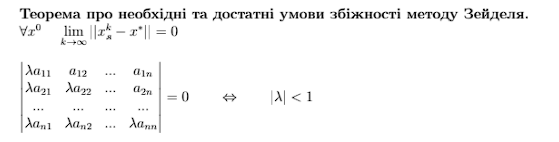): 

In [447]:
# A.T = A
symetric = check_symetric(A) 

# calculate minors
def calculate_minors_determinants(A):
    minor_det = []
    for i in range(A.shape[0]):
        minor_det.append(np.linalg.det(A[:i + 1, :i + 1]))

    return minor_det    

minor_det = calculate_minors_determinants(A)

if symetric and np.all(np.array(minor_det) > 0):
    print("Метод збігається")
else:
    print("Метод не збігається")


Метод збігається


#### Рішення

In [448]:
eps = 0.01

def calculate_next_x(A, b, x) -> np.array:
    next_x = np.zeros(x.shape)
    for i in range(A.shape[0]):
        sum1 = 0
        for j in range(i):
            sum1 += A[i, j]/A[i, i] * next_x[j]
        sum2 = 0
        for j in range(i + 1, A.shape[0]):
            sum2 += A[i, j]/A[i, i] * x[j]
        
        next_x[i] = -sum1 - sum2 + b[i]/A[i, i]
    
    return next_x

def calculate_norm(x, next_x) -> float:
    return np.linalg.norm(x - next_x, ord=np.inf)

def solve_equation(A, b, eps):
    x = np.zeros(b.shape)
    next_x = calculate_next_x(A, b, x)
    print("next_x: ")
    print(next_x)
    while True:
        print("x:")
        print(x)
        print("norma:")
        print(calculate_norm(x, next_x))

        if calculate_norm(x, next_x) < eps:
            break

        x = next_x
        next_x = calculate_next_x(A, b, x)

    return next_x

x = solve_equation(A, b, eps)
print("x:")
print(x)

#print("np.linalg.solve:")
#print(np.linalg.solve(A, b))

next_x: 
[0.1      0.09     0.072    0.05805  0.048429]
x:
[0. 0. 0. 0. 0.]
norma:
0.1
x:
[0.1      0.09     0.072    0.05805  0.048429]
norma:
0.0870345
x:
[0.0129655  0.03741435 0.05766258 0.06586388 0.06669458]
norma:
0.007489520416300001
x:
[0.01552551 0.03141848 0.05017306 0.06331927 0.06945564]


### ІІ. Знайти визначник матриці своїм прямим методом. Знайти число обумовленості.


#### Визначник матриці методом квадратних коренів:

In [449]:
def det(A):
    S, D = calculate_S_and_D(A)
    det = 1
    for i in range(A.shape[0]):
        det *= D[i, i] * S[i, i] ** 2

    return det

# A = np.array([[1, 2, 3], [2, 5, 5], [3, 5, 6]])
print("det:")
print(det(A))

print("np.linalg.det:")
print(np.linalg.det(A))

det:
8095852.000000001
np.linalg.det:
8095852.000000006


#### Число обумовленості

In [450]:
def condtion_number(A):
    return np.linalg.norm(A, ord=np.inf) * np.linalg.norm(np.linalg.inv(A), ord=np.inf)

# A = np.array([[1, 0.99], [0.99, 0.98]])
print("condtion_number:")
print(condtion_number(A))

print("np.linalg.cond:")
print(np.linalg.cond(A, p=np.inf))

condtion_number:
11.159711911729614
np.linalg.cond:
11.159711911729614
